In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
from typing import List, Dict

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
data = pd.read_csv('SpotifyFeatures.csv')

In [20]:
pd.isnull(data).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16828\4016619345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method="pearson")


Text(0.5, 1.0, 'Correlation')

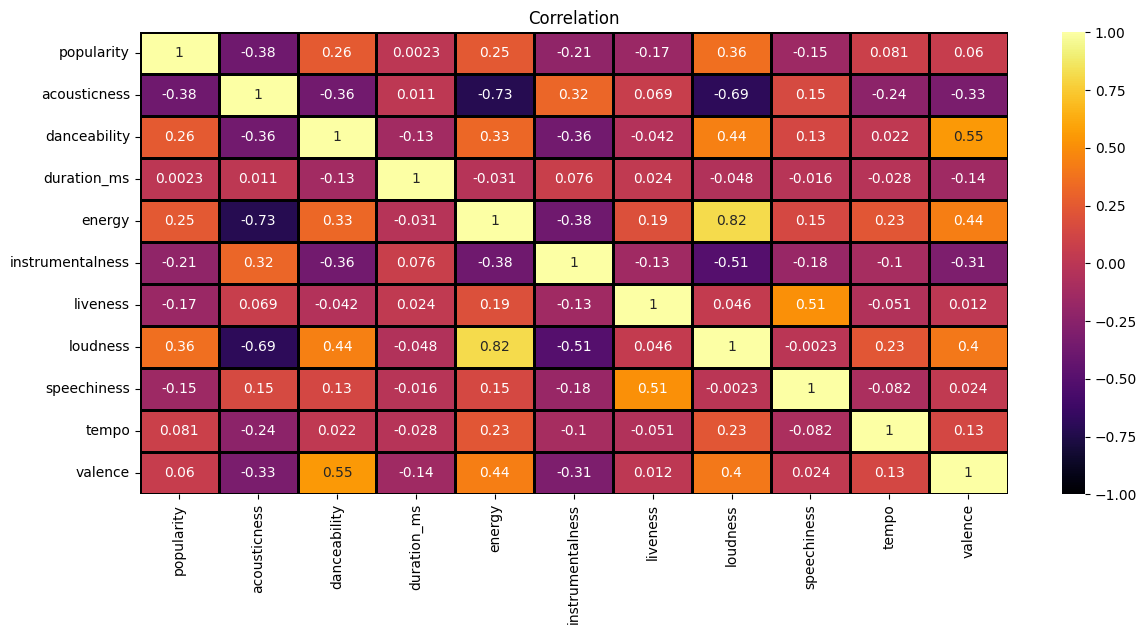

In [24]:
corr = data.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation")

<Axes: xlabel='energy', ylabel='loudness'>

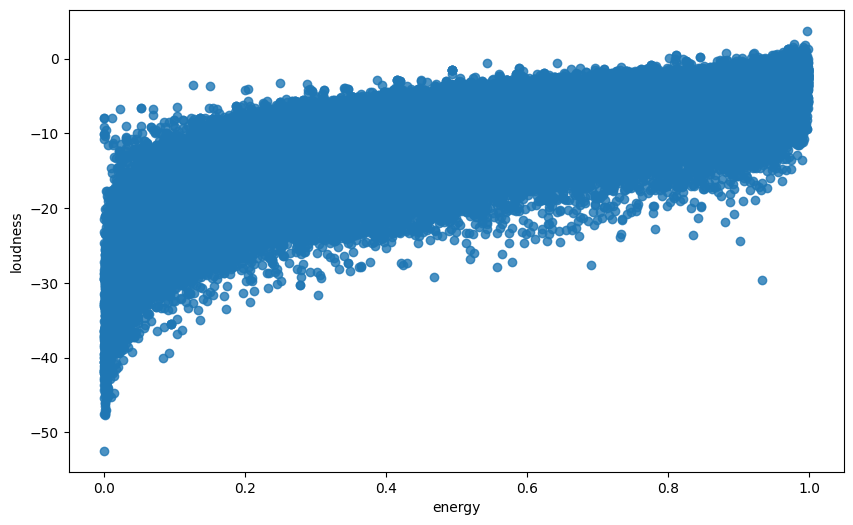

In [25]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y="loudness", x="energy")

In [26]:
sample = data.sample(int(0.001*len(data)))
print(len(sample))

232


[Text(0.5, 1.0, 'Loudness vs Energy')]

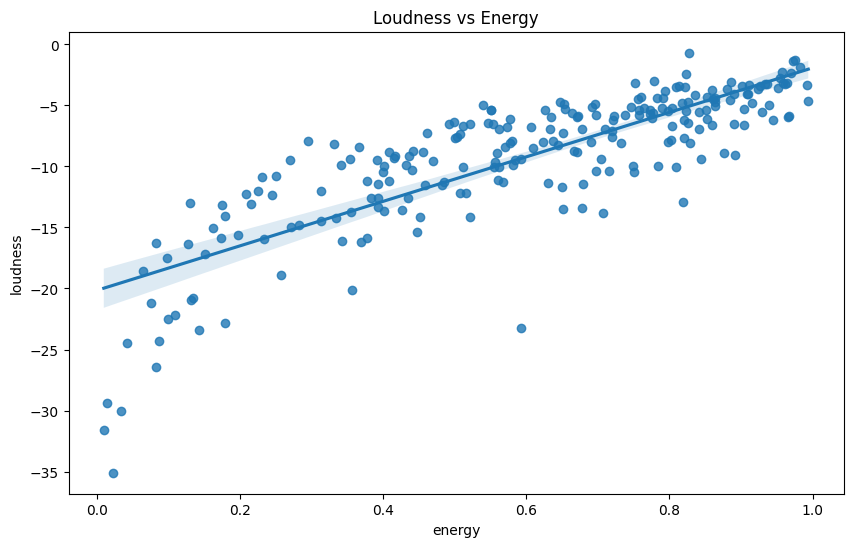

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="loudness", x="energy").set(title="Loudness vs Energy")

<Axes: title={'center': 'Duration of Songs'}, xlabel='duration_ms', ylabel='genre'>

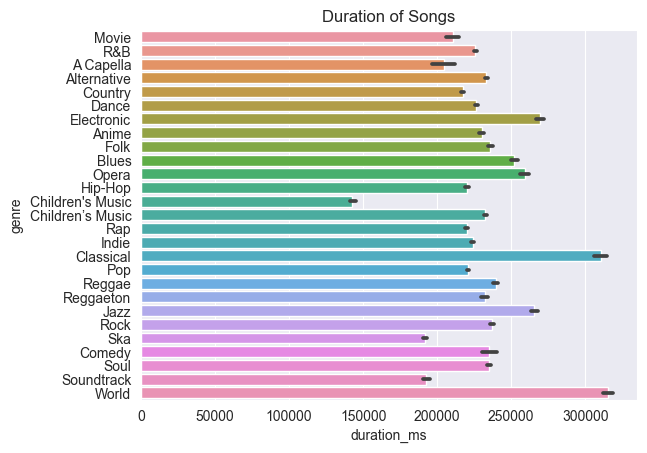

In [28]:
sns.set_style(style="darkgrid")
plt.title("Duration of Songs")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="genre", x="duration_ms", data = data)

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

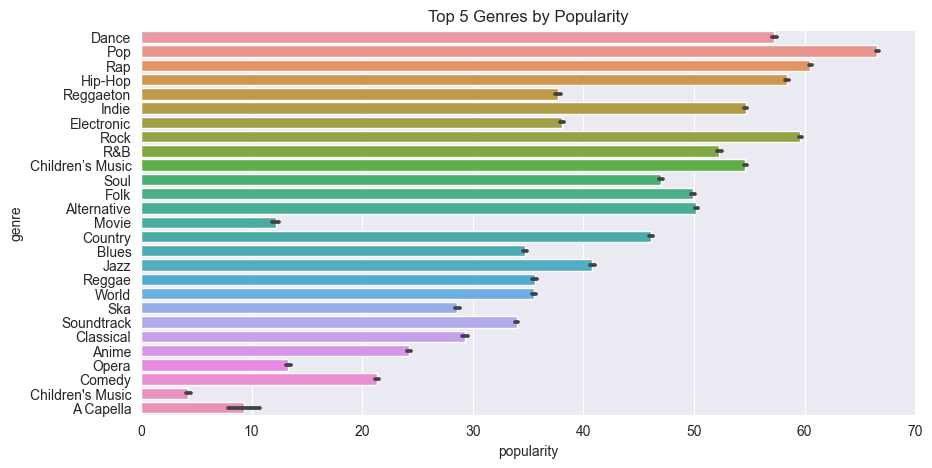

In [29]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending=False)
sns.barplot(y="genre", x="popularity", data = famous).set(title="Top 5 Genres by Popularity")

In [30]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [31]:
X = data.iloc[:, [5,8,12]].valuesb

In [32]:
print(X)

[[  0.611    0.91    -1.828 ]
 [  0.246    0.737   -5.559 ]
 [  0.952    0.131  -13.879 ]
 ...
 [  0.901    0.419   -8.282 ]
 [  0.262    0.704   -7.137 ]
 [  0.0973   0.47    -6.708 ]]


In [35]:
#wcss value for different clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

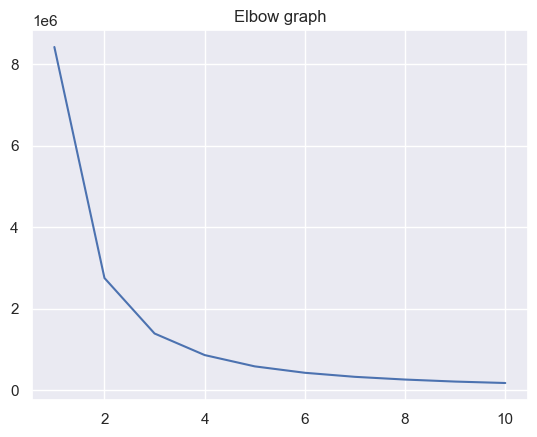

In [36]:
#elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow graph")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

In [38]:
Y = kmeans.fit_predict(X)
# print(Y)

for i in range(10):
  print(Y[i])

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2
2
1
1
0
1
1
2
2
2


Text(0.5, 1.0, 'Clusters')

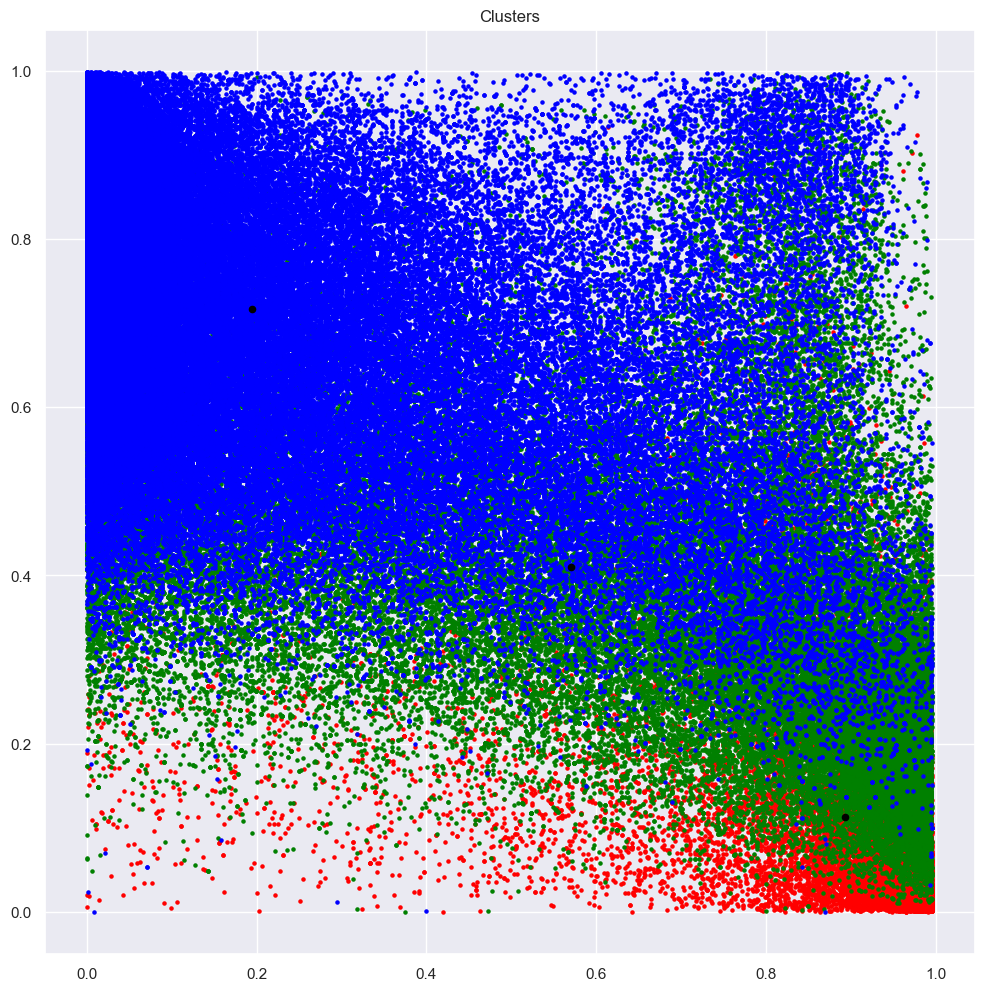

In [39]:
plt.figure(figsize=(12,12))
plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='Centroids')

plt.title("Clusters")

In [40]:
from sklearn.metrics.pairwise import cosine_similarity

NameError: name 'danceability' is not defined